# 迷路

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 迷路の描画

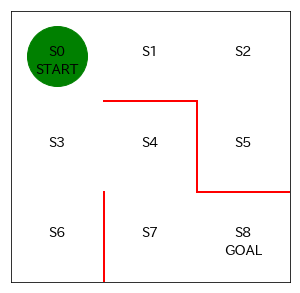

In [31]:
# 図を描く大きさ
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 赤い壁
plt.plot([1,1], [0,1], color='red', linewidth=2)
plt.plot([1,2], [2,2], color='red', linewidth=2)
plt.plot([2,2], [2,1], color='red', linewidth=2)
plt.plot([2,3], [1,1], color='red', linewidth=2)

# 状態を示す文字
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', size=14, ha='center')
plt.text(2.5, 0.3, 'GOAL', size=14, ha='center')

# 描画範囲の設定と目盛削除
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both',
                which='both',
                bottom='off',
                top='off',
               labelbottom='off',
                right='off',
                left='off',
                labelleft='off')

# 現在地S0を丸緑にする
line, = ax.plot([0.5], [2.5],
                marker='o',
                color='g',
                markersize=60)

## エージェントの実装

迷路内を丸緑で示されたエージェントがランダムに移動してゴールするロジックを実装し、その様子を可視化する。
強化学習ではエージェントがどのように行動するかを定めたルールを方策（Policy）と呼ぶ。

迷路の場合、状態sとはエージェントがどの位置にいるのかを示し、行動aはその状態でエージェントが実行できる行動を示す。
方策は様々な形で表現される。今回は関数を使用するが、より高度な方法として深層学習を利用することもある。

In [32]:
# 初期の方策を決定するパラメータを設定
# 行は状態0~7、列は移動報告で ↑、→、↓、←
theta_0 = np.array([[np.nan, 1, 1, np.nan], # s0
                   [np.nan, 1, np.nan, 1], # s1
                   [np.nan, np.nan, 1, 1], # s2
                   [1, 1, 1, np.nan], # s3
                   [np.nan, np.nan, 1, 1], # s4
                   [1, np.nan, np.nan, np.nan], # s5
                   [1, np.nan, np.nan, np.nan], # s6
                   [1, 1, np.nan, np.nan]]) # s7

In [38]:
# 方策パラメータthetaを行動方策piに変換する関数
def simple_convert_into_pi_thera(theta):
    '''単純に割合を計算'''
    
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        
    pi = np.nan_to_num(pi)
    
    return pi

In [40]:
# 初期の方策pi_0を求める
pi_0 = simple_convert_into_pi_thera(theta_0)
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [41]:
# 1step移動後の状態sを求める
def get_next_s(pi, s):
    direction = ['up', 'right', 'down', 'left',]
    
    # pi[s, :]の確立に従って、進む方向を選択　データを指定の確率でランダム選択
    next_direction = np.random.choice(direction, p=pi[s, :])
    
    if next_direction =='up':
        s_next = s - 3
    elif next_direction =='right':
        s_next = s + 1
    elif next_direction =='down':
        s_next = s + 3
    elif next_direction =='left':
        s_next = s - 1
        
    return s_next

In [50]:
# エージェントがゴールするまで移動させる関数
def goal_maze(pi):
    s = 0
    state_history = [0]
    
    while (1):
        next_s = get_next_s(pi, s)
        state_history.append(next_s)
        
        if next_s == 8:
            break
        else:
            s = next_s
            
    return state_history

In [51]:
# 実行
state_history = goal_maze(pi_0)

In [52]:
print(state_history)
print("迷路を解くのにかかったステップ数は" + str(len(state_history) - 1) + "です")

[0, 3, 6, 3, 6, 3, 6, 3, 6, 3, 4, 7, 8]
迷路を解くのにかかったステップ数は12です


In [65]:
# 移動の様子を可視化
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML

def init():
    '''背景の初期化'''
    line.set_data([], [])
    return (line,)

def animate(i):
    '''フレーム毎の描写'''
    state = state_history[i]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line,)

In [66]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    state_history), interval=200, repeat=False)

HTML(anim.to_jshtml())